<a href="https://colab.research.google.com/github/ramirovsjunior/aprendizagem_de_maquina/blob/main/Selecao_de_Caracteristica_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Seleção de Característica para Aprendizado de Máquina

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# import the dataset
data = pd.read_csv("weight_loss.csv",names=["A","B"])

# weight mean for group A and B
mean_group_a = data.A.mean()
mean_group_b = data.B.mean()

# print the results
print(mean_group_a,mean_group_b)

2.82 5.34


In [7]:
data.shape

(50, 2)

In [8]:
data.head()

,A,B
0,3,5
1,2,4
2,3,5
3,4,5
4,3,4


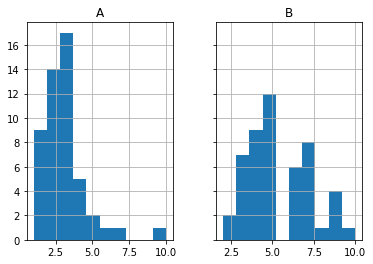

In [9]:
data.hist(sharey=True)
plt.show()

## Teste Estatístico

In [11]:
mean_group_b - mean_group_a

2.52

In [12]:
import numpy as np

# concatenate A and B in a vector
df = pd.concat([data.A,data.B],axis=0,ignore_index=True)

# shuffle all values
all_values= df.reindex(np.random.permutation(df.index)).values
all_values

array([ 3,  5,  5,  3,  3,  5,  5,  4,  5,  4,  7,  3,  6,  9,  5,  1,  3,
        6,  3,  2,  7,  3,  4,  1,  2,  6,  3,  3,  4,  1,  4,  3,  2,  9,
        3,  6,  3,  1,  5,  4,  4,  2,  4,  4,  2,  9,  1,  3,  3,  1,  5,
        5,  3,  9,  5,  4,  7,  1,  3, 10,  5,  2,  1,  4,  7,  4,  6,  7,
        6,  7,  7,  2,  5,  3,  2,  5,  2,  2,  4,  2,  3,  2,  7,  2,  8,
        5,  7,  1,  6,  3,  3,  2,  2,  4,  3,  3,  2,  3, 10,  3])

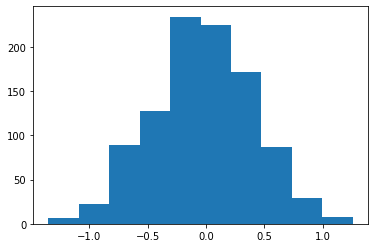

In [13]:
mean_difference = 2.52
mean_differences = []
for i in range(1000):
    group_a = []
    group_b = []
    for value in all_values:
        assignment_chance = np.random.rand()
        if assignment_chance >= 0.5:
            group_a.append(value)
        else:
            group_b.append(value)
    iteration_mean_difference = np.mean(group_b) - np.mean(group_a)
    mean_differences.append(iteration_mean_difference)
   
plt.hist(mean_differences)
plt.show()

In [14]:
sampling_distribution = {}
for diff in mean_differences:
    if sampling_distribution.get(diff, False):
        sampling_distribution[diff] = sampling_distribution[diff] + 1
    else:
        sampling_distribution[diff] = 1

In [15]:
sorted(sampling_distribution.items(), key=lambda kv: kv[1],reverse=True)[:10]

[(-0.1200000000000001, 9),
 (0.2103572862304297, 8),
 (-0.1968787515006003, 7),
 (0.33939393939393936, 7),
 (0.009634684865515553, 7),
 (-0.09339774557165814, 6),
 (-0.11079887595343241, 6),
 (0.046474358974359475, 6),
 (-0.1300682456844635, 5),
 (0.07371794871794801, 5)]

In [16]:
# P Value
frequencies = []
for sp in sampling_distribution.keys():
    if sp >= 2.52:
        frequencies.append(sampling_distribution[sp])
p_value = np.sum(frequencies) / 1000
p_value

0.0

## Teste Qui-Quadrado

In [17]:
import pandas as pd

# columns used 
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
           'marital_status', 'occupation', 'relationship', 'race', 
           'sex','capital_gain', 'capital_loss', 'hours_per_week',
           'native_country','high_income']
# importing the dataset
income = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                   header=None,
                   names=columns)

income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
